In [8]:
import os
from collections import Counter
import cv2
import matplotlib.pyplot as plt

In [10]:
folders = ["train", "valid", "test"]

for f in folders:
    img_path = f"raw_data/{f}/images"
    label_path = f"raw_data/{f}/labels"
    print(f"{f}: {len(os.listdir(img_path))} images, {len(os.listdir(label_path))} labels")

train: 3405 images, 3405 labels
valid: 161 images, 161 labels
test: 158 images, 158 labels


In [11]:
all_labels = []
for f in folders:
    label_path = f"raw_data/{f}/labels"
    for file in os.listdir(label_path):
        with open(os.path.join(label_path, file), "r") as txt:
            for line in txt:
                class_id = line.split()[0]
                all_labels.append(int(class_id))

counter = Counter(all_labels)
print("Class distribution:", counter)

Class distribution: Counter({5: 1343, 8: 1074, 3: 1038, 1: 936, 4: 851, 7: 817, 2: 667, 6: 609, 0: 597})


In [13]:
import numpy as np

label_folder = "raw_data/test/labels"
label_files = [f for f in os.listdir(label_folder) if f.endswith(".txt")]

def polygon_to_bbox(coords, img_w, img_h):
    # coords là list: [x1,y1,x2,y2,...]
    coords = np.array(coords).reshape(-1,2)
    coords[:,0] *= img_w
    coords[:,1] *= img_h
    x_min = int(coords[:,0].min())
    y_min = int(coords[:,1].min())
    x_max = int(coords[:,0].max())
    y_max = int(coords[:,1].max())
    return x_min, y_min, x_max, y_max

for lf in label_files:
    label_path = os.path.join(label_folder, lf)
    with open(label_path) as f:
        for line in f:
            parts = list(map(float, line.strip().split()))


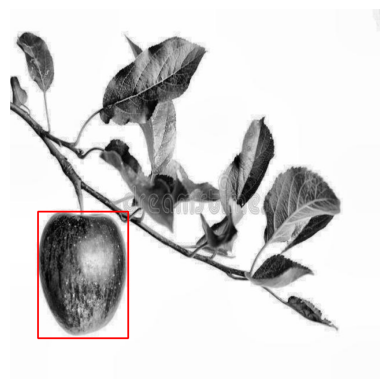

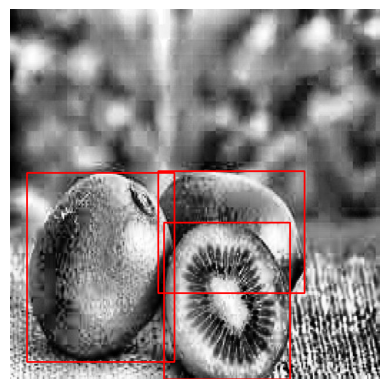

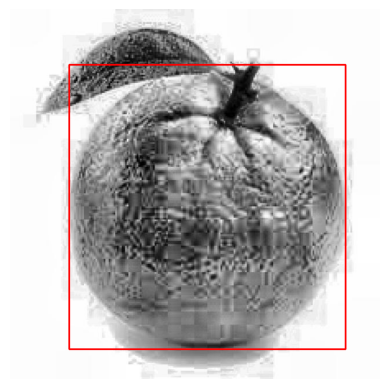

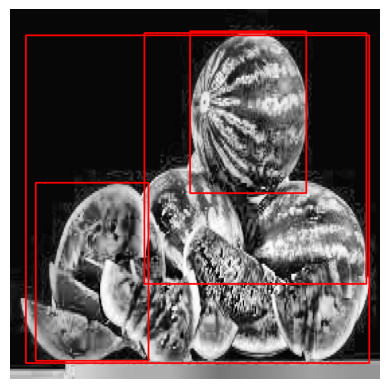

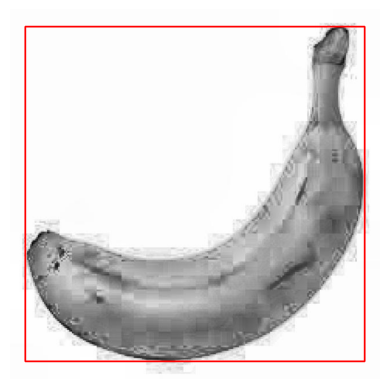

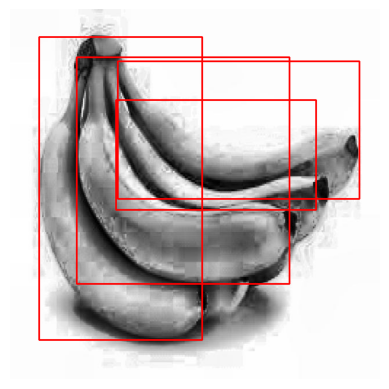

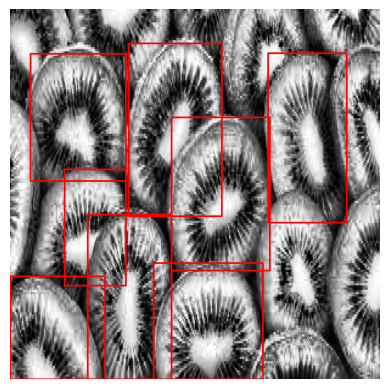

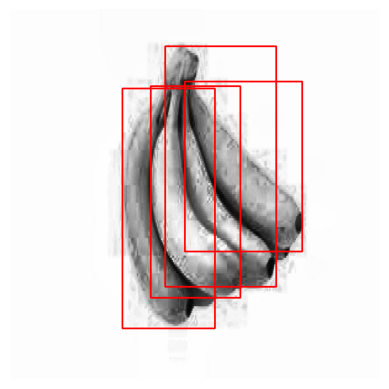

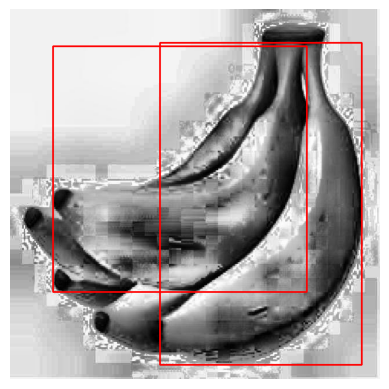

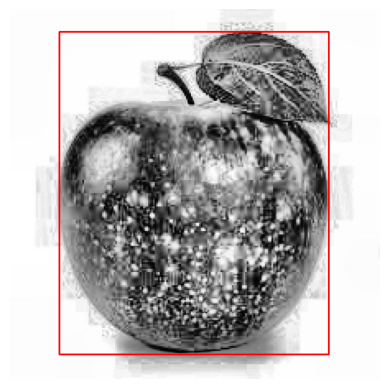

In [ ]:
image_folder = "raw_data/test/images"

for lf in label_files[:5]:
    label_path = os.path.join(label_folder, lf)
    img_name = lf.replace(".txt", ".jpg")
    img_path = os.path.join(image_folder, img_name)
    
    img = cv2.imread(img_path)
    if img is None:
        print(f"Không tìm thấy ảnh {img_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape
    
    with open(label_path) as f:
        for line in f:
            parts = list(map(float, line.strip().split()))
            if len(parts) < 3:
                continue
            class_id = int(parts[0])
            polygon = parts[1:]
            x1, y1, x2, y2 = polygon_to_bbox(polygon, w, h)
            cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 2)
    
    plt.imshow(img)
    plt.axis("off")
    plt.show()

In [ ]:
# def show_image_with_boxes(image_path, label_path):
#     img = cv2.imread(image_path)
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#     h, w, _ = img.shape
    
#     with open(label_path) as f:
#         for line in f:
#             class_id, x, y, bw, bh = map(float, line.split())
#             x1 = int((x - bw/2) * w)
#             y1 = int((y - bh/2) * h)
#             x2 = int((x + bw/2) * w)
#             y2 = int((y + bh/2) * h)
#             cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 2)
    
#     plt.imshow(img)
#     plt.axis("off")
#     plt.show()

# train_images = os.listdir("data/train/images")
# for img_file in train_images[:5]:
#     show_image_with_boxes(
#         f"data/train/images/{img_file}", 
#         f"data/train/labels/{img_file.replace('.jpg','.txt')}"
#     )

ValueError: too many values to unpack (expected 5)